# Description  

**A small town in Romania has been experiencing a sudden outbreak of a mysterious disease rumoured to be the work of vampires. There is no knowledge of who the vampires will go for next. You are given the data from lifestyle and medical reports of patients from the local clinic. You must make a predictive model that will predict whether a patient is infected or not ( binary classification ) from the given data.**


# Features : 

* ID: Unique identifier for each patient.
* DateOfReport: Date when the patient's information was recorded.
* Gender: Gender of the patient (e.g., Male, Female).
* Date_of_Birth: Date of birth of the patient.
* Height: Patient's height in feet.
* Weight: Patient's weight in kg.
* Hypertension: Indicates if the patient has high blood pressure (Yes/No).
* Glucose: Indicates if the Glucose levels in the patient's blood are abnormal.
* Smoking: Smoking status of the patient 
* Diet: Information about the patient's diet habits.
* Cholesterol: Cholesterol levels in the patient's blood.
* Asthma: Indicates if the patient has asthma (Yes/No).
* Diabetes: Indicates if the patient has diabetes (Yes/No).
* Physical: Information related to the patient's physical activity.
* Insurance: Details about the patient's insurance coverage.
* Platelet deficiency: Indicates if the patient has a platelet deficiency (Yes/No).
* Haemoglobin: Haemoglobin levels in the patient's blood.
* Bilirubin: Bilirubin levels in the patient's blood.
* SpO2: Oxygen saturation level in the patient's blood.
* Bone_Density: Information about the patient's bone density.
* Income: Patient's income level.
* Alcohol: Alcohol consumption status of the patient .
* Educational_Qualification: The patient's highest educational qualification.
* CBC: Complete Blood Count information.
* Thyroid: Indicates if the patient has a thyroid condition (Yes/No).
* History: Whether the clinic possesses the previous history of the patient.
* Infected: Indicates if the patient is infected with the mysterious sickness.


# Dataset 

* Train - https://drive.google.com/file/d/167hs27NxRD0btW-frChBRH3n-EqCC_kC/view?usp=sharing 
* Test - https://drive.google.com/file/d/121NWTUUIImFallW3bSA1a_1_sNhSkV2Q/view?usp=sharing 
* Sample Submission - https://drive.google.com/file/d/1ejtGxUJYsx4nAfg_T86Vi1d0UjMi2e8_/view?usp=sharing 


# Evaluation

The contestants will be evaluated based on F1-score . Note that the final results will be declared on the private test dataset which is hidden from the contestants and may have a different distribution than the public test dataset. 


In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
# plt.style.use('ggplot')

# Load Data

In [2]:
df = pd.read_csv("train.csv",low_memory=False,parse_dates=["Date_of_Birth","DateOfReport"])

df.shape

(123140, 27)

In [3]:
df.head()

,ID,DateOfReport,Gender,Date_of_Birth,Height,Weight,Hypertension,Glucose,Smoking,Diet,...,Bilirubin,SpO2,Bone_Density,Income,Alcohol,Educational_Qualification,CBC,Thyroid,History,Infected
0,DXEJ4wRX,2022-10-28,Female,1987-01-01,4 feet 10 inches,50.0,0.0,0.0,No,Mineral deficiency,...,0.0,0.0,0.0,8.0,abstinent,high-school,VMX6,106.79,True,0.0
1,gnbiB6sM,2022-08-28,Female,1946-02-08,4 feet 7 inches,56.0,1.0,0.0,Infrequent Smoker,Hyperlipidic,...,0.0,0.0,0.0,8.0,moderate,high-school,VMX4,122.73,True,0.0
2,KyS4odhc,2022-02-01,Female,1965-12-31,4 feet 11 inches,62.0,1.0,1.0,Infrequent Smoker,Low vitamin intake,...,0.0,0.0,0.0,8.0,moderate,post-graduate,VMX2,84.66,True,0.0
3,FRFos3A3,2022-01-26,Female,1949-03-14,5 feet 7 inches,106.0,1.0,0.0,Infrequent Smoker,Hyperlipidic,...,0.0,0.0,1.0,7.0,abstinent,post-graduate,VMX6,76.36,True,0.0
4,NrtQiC4i,2022-09-24,Female,1959-03-05,5 feet 1 inches,89.0,1.0,1.0,No,Poor,...,0.0,21.0,1.0,2.0,abstinent,post-graduate,VMX6,60.35,True,0.0


# EDA

In [4]:
df["Infected"].value_counts()

Infected
0.0    112584
1.0     10556
Name: count, dtype: int64

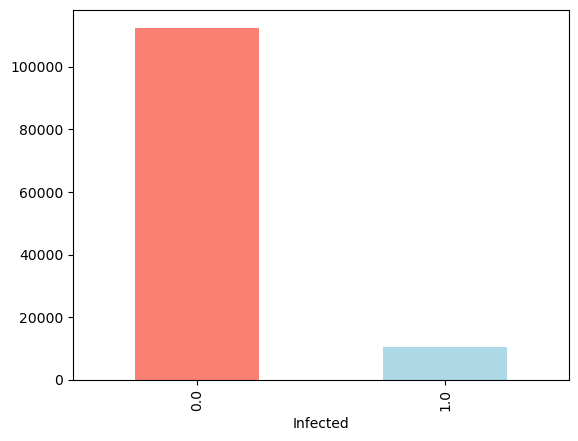

In [5]:
df["Infected"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [6]:
df.isna().sum()

ID                           0
DateOfReport                 0
Gender                       0
Date_of_Birth                0
Height                       0
Weight                       0
Hypertension                 0
Glucose                      0
Smoking                      0
Diet                         0
Cholestrol                   0
Asthama                      0
Diabetes                     0
Physical                     0
Insurance                    0
Platelet deficiency          0
Haemoglobin                  0
Bilirubin                    0
SpO2                         0
Bone_Density                 0
Income                       0
Alcohol                      0
Educational_Qualification    0
CBC                          0
Thyroid                      0
History                      0
Infected                     0
dtype: int64

In [7]:
df.dtypes

ID                                   object
DateOfReport                 datetime64[ns]
Gender                               object
Date_of_Birth                datetime64[ns]
Height                               object
Weight                              float64
Hypertension                        float64
Glucose                             float64
Smoking                              object
Diet                                 object
Cholestrol                          float64
Asthama                             float64
Diabetes                            float64
Physical                             object
Insurance                            object
Platelet deficiency                 float64
Haemoglobin                         float64
Bilirubin                           float64
SpO2                                float64
Bone_Density                        float64
Income                              float64
Alcohol                              object
Educational_Qualification       

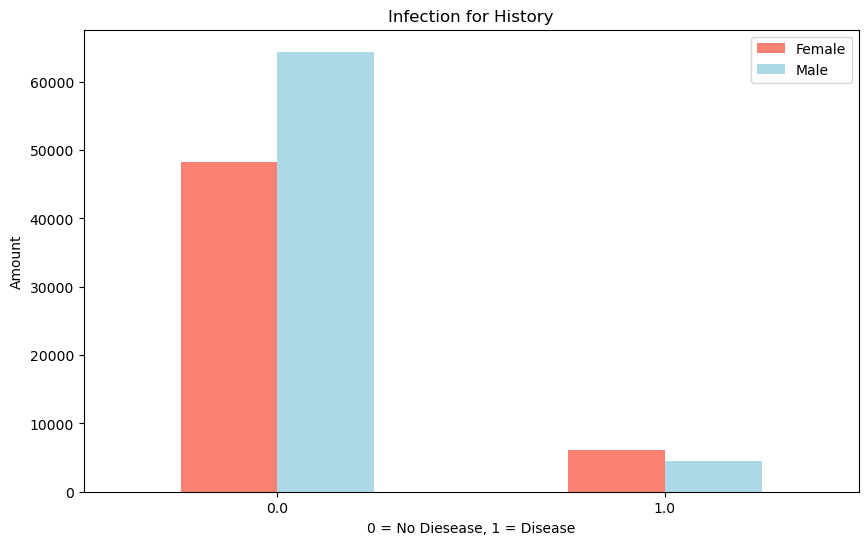

In [8]:
# Create a plot of crosstab
pd.crosstab(df.Infected, df.Gender).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Infection for History")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

In [9]:
df.Date_of_Birth

0        1987-01-01
1        1946-02-08
2        1965-12-31
3        1949-03-14
4        1959-03-05
            ...    
123135   1982-07-20
123136   1984-09-02
123137   1974-12-28
123138   1955-11-30
123139   2003-05-15
Name: Date_of_Birth, Length: 123140, dtype: datetime64[ns]

In [10]:
df.DateOfReport

0        2022-10-28
1        2022-08-28
2        2022-02-01
3        2022-01-26
4        2022-09-24
            ...    
123135   2022-05-30
123136   2022-09-24
123137   2022-10-12
123138   2022-10-14
123139   2022-08-07
Name: DateOfReport, Length: 123140, dtype: datetime64[ns]

In [11]:
df.columns

Index(['ID', 'DateOfReport', 'Gender', 'Date_of_Birth', 'Height', 'Weight',
       'Hypertension', 'Glucose', 'Smoking', 'Diet', 'Cholestrol', 'Asthama',
       'Diabetes', 'Physical', 'Insurance', 'Platelet deficiency',
       'Haemoglobin', 'Bilirubin ', 'SpO2', 'Bone_Density', 'Income',
       'Alcohol', 'Educational_Qualification', 'CBC', 'Thyroid', 'History',
       'Infected'],
      dtype='object')

In [12]:
df.Height

0         4 feet 10 inches
1          4 feet 7 inches
2         4 feet 11 inches
3          5 feet 7 inches
4          5 feet 1 inches
                ...       
123135     6 feet 2 inches
123136     4 feet 9 inches
123137     5 feet 4 inches
123138    4 feet 10 inches
123139     4 feet 7 inches
Name: Height, Length: 123140, dtype: object

In [13]:
df.Smoking.value_counts()

Smoking
No                   71568
Infrequent Smoker    46260
Frequent Smoker       4778
Active Smoker          534
Name: count, dtype: int64

In [14]:
df.dtypes

ID                                   object
DateOfReport                 datetime64[ns]
Gender                               object
Date_of_Birth                datetime64[ns]
Height                               object
Weight                              float64
Hypertension                        float64
Glucose                             float64
Smoking                              object
Diet                                 object
Cholestrol                          float64
Asthama                             float64
Diabetes                            float64
Physical                             object
Insurance                            object
Platelet deficiency                 float64
Haemoglobin                         float64
Bilirubin                           float64
SpO2                                float64
Bone_Density                        float64
Income                              float64
Alcohol                              object
Educational_Qualification       

In [15]:
df.Diet.value_counts()

Diet
Hyperlipidic          34932
Mineral deficiency    33042
Low vitamin intake    30680
Poor                  14441
Low protein intake     8765
Balanced               1280
Name: count, dtype: int64

In [16]:
df.columns

Index(['ID', 'DateOfReport', 'Gender', 'Date_of_Birth', 'Height', 'Weight',
       'Hypertension', 'Glucose', 'Smoking', 'Diet', 'Cholestrol', 'Asthama',
       'Diabetes', 'Physical', 'Insurance', 'Platelet deficiency',
       'Haemoglobin', 'Bilirubin ', 'SpO2', 'Bone_Density', 'Income',
       'Alcohol', 'Educational_Qualification', 'CBC', 'Thyroid', 'History',
       'Infected'],
      dtype='object')

In [17]:
current_date = pd.to_datetime('now')  # Get the current date and time
df['Age'] = ((current_date - df['Date_of_Birth']).dt.days / 365.25).round().astype(int)

In [18]:
df = df[['Age','Gender', 'Height', 'Weight',
       'Hypertension', 'Glucose', 'Smoking', 'Diet', 'Cholestrol', 'Asthama',
       'Diabetes', 'Physical', 'Platelet deficiency',
       'Haemoglobin', 'Bilirubin ', 'SpO2', 'Bone_Density',
       'Alcohol', 'CBC', 'Thyroid', 'History',
       'Infected']].copy()

In [19]:
df.head()

,Age,Gender,Height,Weight,Hypertension,Glucose,Smoking,Diet,Cholestrol,Asthama,...,Platelet deficiency,Haemoglobin,Bilirubin,SpO2,Bone_Density,Alcohol,CBC,Thyroid,History,Infected
0,37,Female,4 feet 10 inches,50.0,0.0,0.0,No,Mineral deficiency,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,abstinent,VMX6,106.79,True,0.0
1,78,Female,4 feet 7 inches,56.0,1.0,0.0,Infrequent Smoker,Hyperlipidic,1.0,0.0,...,0.0,2.0,0.0,0.0,0.0,moderate,VMX4,122.73,True,0.0
2,58,Female,4 feet 11 inches,62.0,1.0,1.0,Infrequent Smoker,Low vitamin intake,1.0,0.0,...,0.0,2.0,0.0,0.0,0.0,moderate,VMX2,84.66,True,0.0
3,75,Female,5 feet 7 inches,106.0,1.0,0.0,Infrequent Smoker,Hyperlipidic,1.0,0.0,...,0.0,3.0,0.0,0.0,1.0,abstinent,VMX6,76.36,True,0.0
4,65,Female,5 feet 1 inches,89.0,1.0,1.0,No,Poor,1.0,0.0,...,0.0,5.0,0.0,21.0,1.0,abstinent,VMX6,60.35,True,0.0


In [20]:
def convert_height(height_str):
    feet, inches = height_str.split(' feet ')
    inches = inches.replace(' inches', '')
    total_height = int(feet) + int(inches) / 12  # 12 inches in a foot
    return round(total_height, 2)

df['Height'] = df['Height'].apply(convert_height)

In [21]:
def convert_gender(gender_str):
    if gender_str == "Male":
        return 1
    else:
        return 0

In [22]:
df['Gender'] = df['Gender'].apply(convert_gender)

In [23]:
df.Smoking.value_counts()

Smoking
No                   71568
Infrequent Smoker    46260
Frequent Smoker       4778
Active Smoker          534
Name: count, dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Smoking_encoded'] = label_encoder.fit_transform(df['Smoking'])

In [25]:
df.Smoking_encoded.value_counts()

Smoking_encoded
3    71568
2    46260
1     4778
0      534
Name: count, dtype: int64

In [26]:
df.drop(["Smoking"],inplace=True,axis=1)

In [27]:
df.Physical

0           Active
1           Active
2         Inactive
3           Active
4           Active
            ...   
123135      Active
123136      Active
123137      Active
123138      Active
123139      Active
Name: Physical, Length: 123140, dtype: object

In [28]:
def convert_Physical(_str):
    if _str == "Active":
        return 1
    else:
        return 0

In [29]:
df['Physical'] = df['Physical'].apply(convert_gender)

In [30]:
df.Diet.value_counts()

Diet
Hyperlipidic          34932
Mineral deficiency    33042
Low vitamin intake    30680
Poor                  14441
Low protein intake     8765
Balanced               1280
Name: count, dtype: int64

In [31]:
df = pd.get_dummies(df, columns=['Diet'])
df.head()

,Age,Gender,Height,Weight,Hypertension,Glucose,Cholestrol,Asthama,Diabetes,Physical,...,Thyroid,History,Infected,Smoking_encoded,Diet_Balanced,Diet_Hyperlipidic,Diet_Low protein intake,Diet_Low vitamin intake,Diet_Mineral deficiency,Diet_Poor
0,37,0,4.83,50.0,0.0,0.0,1.0,0.0,0.0,0,...,106.79,True,0.0,3,False,False,False,False,True,False
1,78,0,4.58,56.0,1.0,0.0,1.0,0.0,2.0,0,...,122.73,True,0.0,2,False,True,False,False,False,False
2,58,0,4.92,62.0,1.0,1.0,1.0,0.0,0.0,0,...,84.66,True,0.0,2,False,False,False,True,False,False
3,75,0,5.58,106.0,1.0,0.0,1.0,0.0,2.0,0,...,76.36,True,0.0,2,False,True,False,False,False,False
4,65,0,5.08,89.0,1.0,1.0,1.0,0.0,2.0,0,...,60.35,True,0.0,3,False,False,False,False,False,True


In [32]:
df.Alcohol.unique()

array(['abstinent', 'moderate', 'heavy'], dtype=object)

In [33]:
df['Alcohol'] = label_encoder.fit_transform(df['Alcohol'])

C:\Users\joela\Desktop\ML_course\pulzion\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\joela\Desktop\ML_course\pulzion\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\joela\Desktop\ML_course\pulzion\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


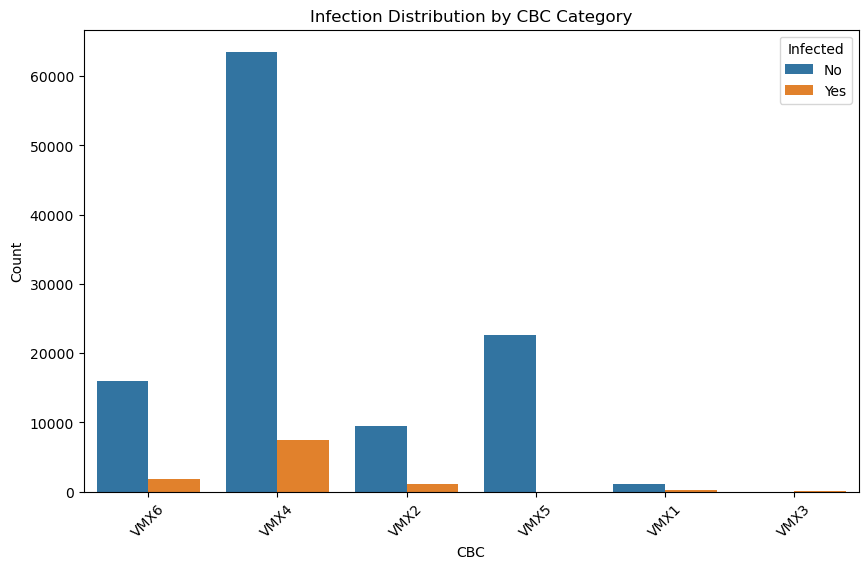

In [34]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='CBC', hue='Infected', data=df, order=['VMX6', 'VMX4', 'VMX2', 'VMX5', 'VMX1', 'VMX3'])

# Set plot labels and title
plt.xlabel('CBC')
plt.ylabel('Count')
plt.title('Infection Distribution by CBC Category')

# Show the plot
plt.xticks(rotation=45)
plt.legend(title='Infected', labels=['No', 'Yes'])
plt.show()


In [35]:
df.drop(["CBC"],axis=1,inplace=True)

In [36]:
df.dtypes

Age                          int32
Gender                       int64
Height                     float64
Weight                     float64
Hypertension               float64
Glucose                    float64
Cholestrol                 float64
Asthama                    float64
Diabetes                   float64
Physical                     int64
Platelet deficiency        float64
Haemoglobin                float64
Bilirubin                  float64
SpO2                       float64
Bone_Density               float64
Alcohol                      int32
Thyroid                    float64
History                       bool
Infected                   float64
Smoking_encoded              int32
Diet_Balanced                 bool
Diet_Hyperlipidic             bool
Diet_Low protein intake       bool
Diet_Low vitamin intake       bool
Diet_Mineral deficiency       bool
Diet_Poor                     bool
dtype: object

In [37]:
df.History

0         True
1         True
2         True
3         True
4         True
          ... 
123135    True
123136    True
123137    True
123138    True
123139    True
Name: History, Length: 123140, dtype: bool

In [38]:
df.to_csv("train_processed.csv",index=False)

In [39]:
df = pd.read_csv("train_processed.csv",low_memory=False)
df.dtypes

Age                          int64
Gender                       int64
Height                     float64
Weight                     float64
Hypertension               float64
Glucose                    float64
Cholestrol                 float64
Asthama                    float64
Diabetes                   float64
Physical                     int64
Platelet deficiency        float64
Haemoglobin                float64
Bilirubin                  float64
SpO2                       float64
Bone_Density               float64
Alcohol                      int64
Thyroid                    float64
History                       bool
Infected                   float64
Smoking_encoded              int64
Diet_Balanced                 bool
Diet_Hyperlipidic             bool
Diet_Low protein intake       bool
Diet_Low vitamin intake       bool
Diet_Mineral deficiency       bool
Diet_Poor                     bool
dtype: object

# Training and Model

In [40]:
from sklearn.model_selection import train_test_split

X = df.drop(["Infected"],axis=1)
y = df["Infected"]

# Split the dataset into training (70%), validation (15%), and testing (15%) sets
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Split the dataset into training and temporary (validation + testing) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=(1 - train_ratio), random_state=42)

# Split the temporary set into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(test_ratio / (test_ratio + val_ratio)), random_state=42)

In [41]:
print("Train set dimensions:", X_train.shape, y_train.shape)
print("Validation set dimensions:", X_val.shape, y_val.shape)
print("Test set dimensions:", X_test.shape, y_test.shape)
print(X.shape,y.shape)

Train set dimensions: (86197, 25) (86197,)
Validation set dimensions: (18471, 25) (18471,)
Test set dimensions: (18472, 25) (18472,)
(123140, 25) (123140,)


In [42]:
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights for the "Infected" class (0 and 1)
classes = [0, 1]
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)

# Create a dictionary for class weights
class_weight_dict = {classes[i]: class_weights[i] for i in range(len(classes))}

print("Class Weights for 'Infected' class:", class_weights)
print("Class Weight Dictionary:", class_weight_dict)


Class Weights for 'Infected' class: [0.54687976 5.83279199]
Class Weight Dictionary: {0: 0.5468797584001625, 1: 5.8327919880904044}


In [43]:
from xgboost import XGBClassifier

model = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42,
    class_weight={0: class_weight_dict[0], 1: class_weight_dict[1]}
    
)
model.fit(X_train,y_train)

C:\Users\joela\Desktop\ML_course\pulzion\env\lib\site-packages\xgboost\core.py:160: UserWarning: [21:11:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight={0: 0.5468797584001625, 1: 5.8327919880904044},
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, nthread=4, ...)

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Make predictions on the validation or test data
y_pred = model.predict(X_val)  # Replace X_val with your validation or test dataset

# Calculate various evaluation metrics
accuracy = accuracy_score(y_val, y_pred)  # Replace y_val with your true labels
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

# Print or use the evaluation metrics as needed
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9141356721346976
Precision: 0.49866666666666665
Recall: 0.11798107255520504
F1 Score: 0.19081632653061223
ROC AUC Score: 0.5534237945981046
Confusion Matrix:
 [[16698   188]
 [ 1398   187]]


In [45]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42
                            ,class_weight={0: class_weight_dict[0], 1: class_weight_dict[1]})

clf.fit(X_train,y_train)


RandomForestClassifier(class_weight={0: 0.5468797584001625,
                                     1: 5.8327919880904044},
                       random_state=42)

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Make predictions on the validation or test data
y_pred = clf.predict(X_val)  # Replace X_val with your validation or test dataset

# Calculate various evaluation metrics
accuracy = accuracy_score(y_val, y_pred)  # Replace y_val with your true labels
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

# Print or use the evaluation metrics as needed
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9148936170212766
Precision: 0.5384615384615384
Recall: 0.05741324921135647
F1 Score: 0.10376282782212086
ROC AUC Score: 0.5263970190152483
Confusion Matrix:
 [[16808    78]
 [ 1494    91]]


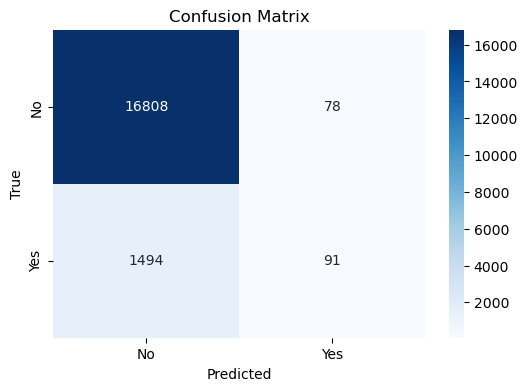

In [47]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()

In [48]:
df.Infected.value_counts()

Infected
0.0    112584
1.0     10556
Name: count, dtype: int64

In [49]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Define the SMOTE and under-sampling strategy
over_sampling_strategy = SMOTE(sampling_strategy='auto', random_state=42)
under_sampling_strategy = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Create a pipeline to combine over-sampling and under-sampling
pipeline = Pipeline([
    ('over_sampling', over_sampling_strategy),
    ('under_sampling', under_sampling_strategy)
])

# Apply the pipeline to your data
X = df.drop('Infected', axis=1)  # Features
y = df['Infected']  # Target variable

X_resampled, y_resampled = pipeline.fit_resample(X, y)


C:\Users\joela\Desktop\ML_course\pulzion\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\joela\Desktop\ML_course\pulzion\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\joela\Desktop\ML_course\pulzion\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


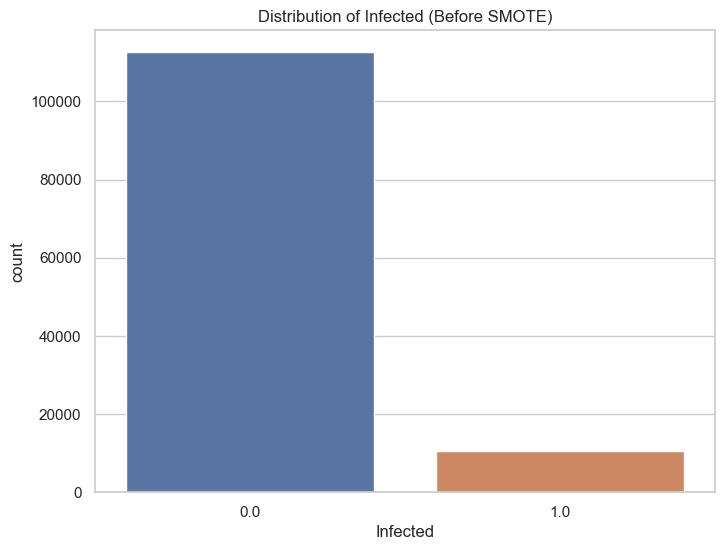

C:\Users\joela\Desktop\ML_course\pulzion\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\joela\Desktop\ML_course\pulzion\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\joela\Desktop\ML_course\pulzion\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


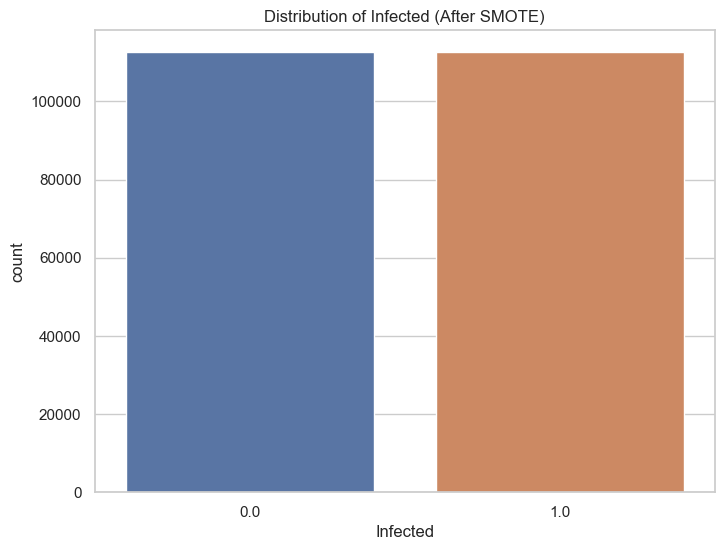

In [50]:
# Create a DataFrame from the resampled data
resampled_df = pd.concat([X_resampled, y_resampled], axis=1)

# Plot the count of 'Infected' before and after SMOTE
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.countplot(data=df, x='Infected')
plt.title('Distribution of Infected (Before SMOTE)')
plt.show()

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.countplot(data=resampled_df, x='Infected')
plt.title('Distribution of Infected (After SMOTE)')
plt.show();

In [51]:
from sklearn.model_selection import train_test_split

X = resampled_df.drop(["Infected"],axis=1)
y = resampled_df["Infected"]

# Split the dataset into training (70%), validation (15%), and testing (15%) sets
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Split the dataset into training and temporary (validation + testing) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=(1 - train_ratio), random_state=42)

# Split the temporary set into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(test_ratio / (test_ratio + val_ratio)), random_state=42)

In [52]:
model = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
    
)
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, nthread=4,
              num_parallel_tree=None, ...)

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Make predictions on the validation or test data
y_pred = model.predict(X_val)  # Replace X_val with your validation or test dataset

# Calculate various evaluation metrics
accuracy = accuracy_score(y_val, y_pred)  # Replace y_val with your true labels
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

# Print or use the evaluation metrics as needed
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9517690599555885
Precision: 0.987665253969258
Recall: 0.915884561238855
F1 Score: 0.9504215235718416
ROC AUC Score: 0.9521133812351984
Confusion Matrix:
 [[16532   195]
 [ 1434 15614]]


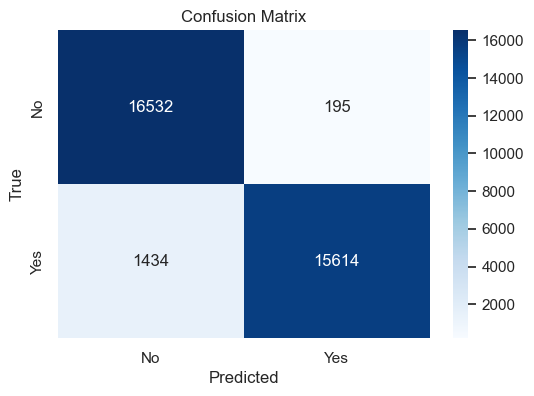

In [55]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()

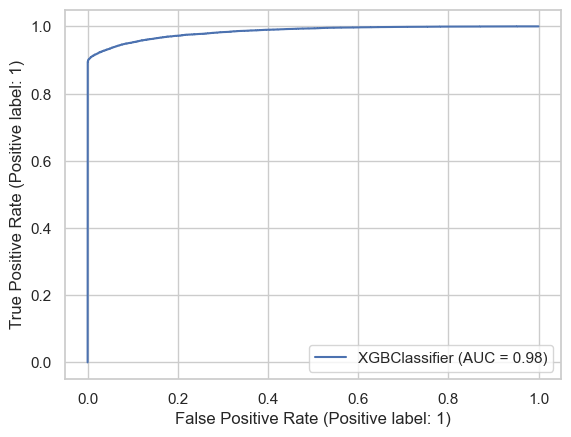

In [57]:
# Plot ROC curve and calculate and calculate AUC metric
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model, X_test, y_test);

# Actual Test Dataset

In [152]:
df_test = pd.read_csv("test.csv",low_memory=False,parse_dates=["Date_of_Birth","DateOfReport"])

df_test.head()

,ID,DateOfReport,Gender,Date_of_Birth,Height,Weight,Hypertension,Glucose,Smoking,Diet,...,Haemoglobin,Bilirubin,SpO2,Bone_Density,Income,Alcohol,Educational_Qualification,CBC,Thyroid,History
0,TzypemZo,2022-08-21,Male,1932-05-08,5 feet 3 inches,46.0,0.0,0.0,Active Smoker,Hyperlipidic,...,3.0,0.0,0.0,0.0,4.0,abstinent,doctorate,VMX2,117.66,True
1,Z2irFtF8,2022-04-19,Male,1952-12-04,5 feet 3 inches,80.0,1.0,1.0,Infrequent Smoker,Low vitamin intake,...,3.0,2.0,15.0,0.0,8.0,heavy,high-school,VMX4,103.97,True
2,K5cVU3gq,2022-01-07,Female,1959-12-20,5 feet 1 inches,84.0,1.0,0.0,Infrequent Smoker,Mineral deficiency,...,3.0,0.0,2.0,0.0,8.0,abstinent,high-school,VMX4,71.81,True
3,9J2p6XNL,2022-04-04,Male,1930-11-21,5 feet 7 inches,75.0,0.0,0.0,No,Low vitamin intake,...,3.0,0.0,0.0,1.0,7.0,abstinent,graduate,VMX4,96.82,True
4,DFVgPm8y,2022-09-01,Male,1970-05-02,5 feet 7 inches,118.0,1.0,0.0,Infrequent Smoker,Poor,...,5.0,0.0,30.0,1.0,5.0,moderate,post-graduate,VMX4,108.60,True


In [153]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df):
    # Calculate age from Date_of_Birth
    current_date = pd.to_datetime('now')
    df['Age'] = ((current_date - df['Date_of_Birth']).dt.days / 365.25).round().astype(int)
    
    # Convert height to a single numeric column
    def convert_height(height_str):
        feet, inches = height_str.split(' feet ')
        inches = inches.replace(' inches', '')
        total_height = int(feet) + int(inches) / 12
        return round(total_height, 2)
    df['Height'] = df['Height'].apply(convert_height)
    
    # Convert gender to numeric (e.g., Male=1, Female=0)
    def convert_gender(gender_str):
        return 1 if gender_str == "Male" else 0
    df['Gender'] = df['Gender'].apply(convert_gender)
    
    # Encode Smoking using LabelEncoder
    label_encoder = LabelEncoder()
    df['Smoking_encoded'] = label_encoder.fit_transform(df['Smoking'])
    
    # Convert "Physical" to binary (e.g., Active=1, Inactive=0)
    def convert_physical(physical_str):
        return 1 if physical_str == "Active" else 0
    df['Physical'] = df['Physical'].apply(convert_physical)
    
    # One-hot encode 'Diet'
    df = pd.get_dummies(df, columns=['Diet'])
    
    # Encode 'Alcohol' using LabelEncoder
    df['Alcohol'] = label_encoder.fit_transform(df['Alcohol'])
    
    # Drop unnecessary columns
    df.drop(["CBC", "Date_of_Birth", "Smoking"], axis=1, inplace=True)
    
    return df

df_test = preprocess_data(df_test)



In [154]:
df_test.columns

Index(['ID', 'DateOfReport', 'Gender', 'Height', 'Weight', 'Hypertension',
       'Glucose', 'Cholestrol', 'Asthama', 'Diabetes', 'Physical', 'Insurance',
       'Platelet deficiency', 'Haemoglobin', 'Bilirubin ', 'SpO2',
       'Bone_Density', 'Income', 'Alcohol', 'Educational_Qualification',
       'Thyroid', 'History', 'Age', 'Smoking_encoded', 'Diet_Balanced',
       'Diet_Hyperlipidic', 'Diet_Low protein intake',
       'Diet_Low vitamin intake', 'Diet_Mineral deficiency', 'Diet_Poor'],
      dtype='object')

In [155]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'Hypertension', 'Glucose',
       'Cholestrol', 'Asthama', 'Diabetes', 'Physical', 'Platelet deficiency',
       'Haemoglobin', 'Bilirubin ', 'SpO2', 'Bone_Density', 'Alcohol',
       'Thyroid', 'History', 'Infected', 'Smoking_encoded', 'Diet_Balanced',
       'Diet_Hyperlipidic', 'Diet_Low protein intake',
       'Diet_Low vitamin intake', 'Diet_Mineral deficiency', 'Diet_Poor'],
      dtype='object')

In [156]:
df_test.drop(["ID","Insurance","Income","Educational_Qualification","DateOfReport"],axis=1,inplace=True)

In [157]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'Hypertension', 'Glucose',
       'Cholestrol', 'Asthama', 'Diabetes', 'Physical', 'Platelet deficiency',
       'Haemoglobin', 'Bilirubin ', 'SpO2', 'Bone_Density', 'Alcohol',
       'Thyroid', 'History', 'Infected', 'Smoking_encoded', 'Diet_Balanced',
       'Diet_Hyperlipidic', 'Diet_Low protein intake',
       'Diet_Low vitamin intake', 'Diet_Mineral deficiency', 'Diet_Poor'],
      dtype='object')

In [158]:
df_test.columns

Index(['Gender', 'Height', 'Weight', 'Hypertension', 'Glucose', 'Cholestrol',
       'Asthama', 'Diabetes', 'Physical', 'Platelet deficiency', 'Haemoglobin',
       'Bilirubin ', 'SpO2', 'Bone_Density', 'Alcohol', 'Thyroid', 'History',
       'Age', 'Smoking_encoded', 'Diet_Balanced', 'Diet_Hyperlipidic',
       'Diet_Low protein intake', 'Diet_Low vitamin intake',
       'Diet_Mineral deficiency', 'Diet_Poor'],
      dtype='object')

In [159]:
df_test= df_test[['Age', 'Gender', 'Height', 'Weight', 'Hypertension', 'Glucose',
       'Cholestrol', 'Asthama', 'Diabetes', 'Physical', 'Platelet deficiency',
       'Haemoglobin', 'Bilirubin ', 'SpO2', 'Bone_Density', 'Alcohol',
       'Thyroid', 'History', 'Smoking_encoded', 'Diet_Balanced',
       'Diet_Hyperlipidic', 'Diet_Low protein intake',
       'Diet_Low vitamin intake', 'Diet_Mineral deficiency', 'Diet_Poor']].copy()
df_test.shape,df.shape

((3700, 25), (123140, 26))

In [160]:
df_test.dtypes

Age                          int32
Gender                       int64
Height                     float64
Weight                     float64
Hypertension               float64
Glucose                    float64
Cholestrol                 float64
Asthama                    float64
Diabetes                   float64
Physical                     int64
Platelet deficiency        float64
Haemoglobin                float64
Bilirubin                  float64
SpO2                       float64
Bone_Density               float64
Alcohol                      int32
Thyroid                    float64
History                       bool
Smoking_encoded              int32
Diet_Balanced                 bool
Diet_Hyperlipidic             bool
Diet_Low protein intake       bool
Diet_Low vitamin intake       bool
Diet_Mineral deficiency       bool
Diet_Poor                     bool
dtype: object

In [70]:
test_preds = model.predict(df_test)


array([0, 0, 0, ..., 0, 0, 0])

In [74]:
df_test1 = pd.read_csv("test.csv",low_memory=False,parse_dates=["Date_of_Birth","DateOfReport"])
df_preds = pd.DataFrame()
df_preds["ID"] = df_test1["ID"]
df_preds["Infected"] = test_preds
df_preds.Infected.value_counts()

Infected
0    3513
1     187
Name: count, dtype: int64

In [75]:
df_preds.to_csv("test_predictions.csv",index=False)

In [78]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

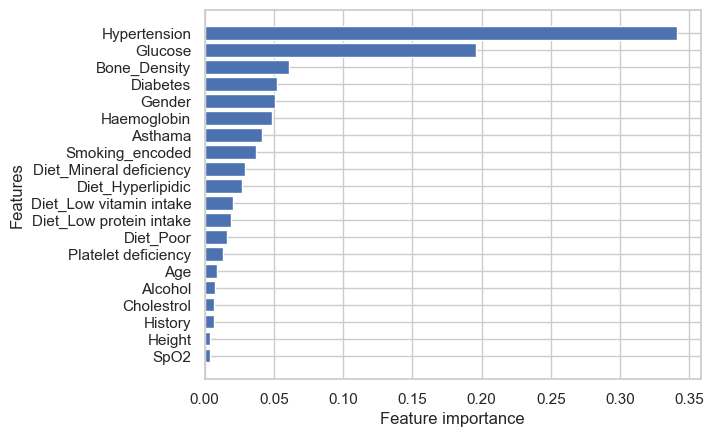

In [80]:
plot_features(X_train.columns, model.feature_importances_)

In [84]:
["Alcohol","Cholestrol","History","Height","Sp02"]

['Alcohol', 'Cholestrol', 'History', 'Height', 'Sp02']

## Retraining

In [98]:
X = df.drop(["Infected"],axis=1)
y = df["Infected"]

# Split the dataset into training (70%), validation (15%), and testing (15%) sets
train_ratio = 0.7
test_ratio = 0.3

# Split the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=42)

In [107]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=False)
clf = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42   
)

In [108]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(clf, X_train, y_train, cv=kf, scoring='recall')
print("Cross Validation Recall scores are: {}".format(score))
print("Average Cross Validation Recall score: {}".format(score.mean()))

Cross Validation Recall scores are: [0.10554804 0.11907984 0.10690122 0.09614083 0.1217862 ]
Average Cross Validation Recall score: 0.10989122338646803


In [109]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
ros = RandomOverSampler(random_state=42)
# fit and apply the transform
X_over, y_over = ros.fit_resample(X_train, y_train)

In [115]:
from imblearn.pipeline import Pipeline, make_pipeline

XGB_overs_pipeline = make_pipeline(RandomOverSampler(random_state=42), 
                              XGBClassifier(objective='binary:logistic',nthread=4,seed=42))

In [116]:
score2 = cross_val_score(XGB_overs_pipeline, X_train, y_train, scoring='recall', cv=kf)
print("Cross Validation Recall Scores are: {}".format(score2))
print("Average Cross Validation Recall score: {}".format(score2.mean()))

Cross Validation Recall Scores are: [0.67050068 0.66576455 0.68064953 0.66215301 0.67117727]
Average Cross Validation Recall score: 0.6700490058204147


In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
# Define your parameter grid for XGBoost
xgb_params = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_child_weight': [5, 10],
    'lambda': [0.1, 1]
}

# Create a new set of parameters using 'xgbclassifier__' prefix
new_xgb_params = {'xgbclassifier__' + key: xgb_params[key] for key in xgb_params}

# Create a GridSearchCV instance for XGBoost
grid_xgb = GridSearchCV(XGB_overs_pipeline, param_grid=new_xgb_params, cv=kf, scoring='recall', return_train_score=True)
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('randomoversampler',
                                        RandomOverSampler(random_state=42)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_cat...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None, nthread=4,
                                                      num_parallel_tree=None, ...))]),
             param_grid={'xgbclassifier__lambda': [0.1, 1],
                         'xgbclassifier__learning_rate': [0.01, 0.1],
                         'xgbclassifier__max_depth': [3, 4, 5],
                         'xgbclassifier__min_child_weight': [5, 10],
                         'xgbclassifier__n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='recall')

In [131]:
print('Best parameters:', grid_xgb.best_params_)
print('Best score:', grid_xgb.best_score_)

Best parameters: {'xgbclassifier__lambda': 1, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__max_depth': 4, 'xgbclassifier__min_child_weight': 5, 'xgbclassifier__n_estimators': 100}
Best score: 0.8232495009175421


In [132]:
y_pred = grid_xgb.best_estimator_.named_steps['xgbclassifier'].predict(X_test)

In [133]:
cm = confusion_matrix(y_test, y_pred)

over_rf_Recall = recall_score(y_test, y_pred)
over_rf_Precision = precision_score(y_test, y_pred)
over_rf_f1 = f1_score(y_test, y_pred)
over_rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[23048 10727]
 [  516  2651]]


In [134]:
ndf = [(over_rf_Recall, over_rf_Precision, over_rf_f1, over_rf_accuracy)]

over_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
over_rf_score.insert(0, 'xgb with', 'Random Oversampling')
over_rf_score

,xgb with,Recall,Precision,F1 Score,Accuracy
0,Random Oversampling,0.83707,0.198161,0.320459,0.695658


In [119]:
from imblearn.over_sampling import SMOTE

smote_pipeline = make_pipeline(SMOTE(random_state=42), 
                              XGBClassifier(objective='binary:logistic',nthread=4,seed=42))

In [120]:
score3 = cross_val_score(smote_pipeline, X_train, y_train, scoring='recall', cv=kf)
print("Cross Validation Recall Scores are: {}".format(score3))
print("Average Cross Validation Recall score: {}".format(score3.mean()))

Cross Validation Recall Scores are: [0.11366712 0.12652233 0.12990528 0.12051456 0.12990528]
Average Cross Validation Recall score: 0.12410291130670278


In [121]:
# Create a new set of parameters using 'xgbclassifier__' prefix
new_xgb_params = {'xgbclassifier__' + key: xgb_params[key] for key in xgb_params}

# Create a GridSearchCV instance for XGBoost
smote_xgb = GridSearchCV(smote_pipeline, param_grid=new_xgb_params, cv=kf, scoring='recall', return_train_score=True)
smote_xgb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metr...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None, nthread=4,
                                                      num_parallel_tree=None, ...))]),
             param_grid={'xgbclassifier__lambda': [0.1, 1],
                         'xgbclassifier__learning_rate': [0.01, 0.1],
                         'xgbclassifier__max_depth': [3, 4, 5],
                         'xgbclassifier__min_child_weight': [5, 10],
                         'xgbclassifier__n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='recall')

In [135]:
print('Best parameters:', smote_xgb.best_params_)
print('Best score:', smote_xgb.best_score_)

Best parameters: {'xgbclassifier__lambda': 1, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__max_depth': 3, 'xgbclassifier__min_child_weight': 5, 'xgbclassifier__n_estimators': 100}
Best score: 0.4843696261027225


In [137]:
y_pred = smote_xgb.best_estimator_.named_steps['xgbclassifier'].predict(X_test)

In [138]:
cm = confusion_matrix(y_test, y_pred)

smote_rf_Recall = recall_score(y_test, y_pred)
smote_rf_Precision = precision_score(y_test, y_pred)
smote_rf_f1 = f1_score(y_test, y_pred)
smote_rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[28951  4824]
 [ 1595  1572]]


In [139]:
ndf = [(smote_rf_Recall, smote_rf_Precision, smote_rf_f1, smote_rf_accuracy)]

smote_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
smote_rf_score.insert(0, 'Random Forest with', 'SMOTE Oversampling')
smote_rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,SMOTE Oversampling,0.496369,0.245779,0.328767,0.826241


In [140]:
from imblearn.under_sampling import TomekLinks

# define the undersampling method
tomekU = TomekLinks(sampling_strategy='auto', n_jobs=-1)

# fit and apply the transform
X_underT, y_underT = tomekU.fit_resample(X_train, y_train)

In [141]:
from imblearn.combine import SMOTETomek

SMOTETomek_pipeline = make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')), 
                              XGBClassifier(objective='binary:logistic',nthread=4,seed=42))

In [142]:
cross_val_score(smote_pipeline, X_train, y_train, scoring='recall', cv=kf)

array([0.11366712, 0.12652233, 0.12990528, 0.12051456, 0.12990528])

In [145]:
score4 = cross_val_score(SMOTETomek_pipeline, X_train, y_train, scoring='recall', cv=kf) 
print("Cross Validation Recall Scores are: {}".format(score4))
print("Average Cross Validation Recall score: {}".format(score4.mean()))

Cross Validation Recall Scores are: [0.1150203  0.12381597 0.12584574 0.11577522 0.12449256]
Average Cross Validation Recall score: 0.12098995605142635


In [147]:
# Create a new set of parameters using 'xgbclassifier__' prefix
new_xgb_params = {'xgbclassifier__' + key: xgb_params[key] for key in xgb_params}

# Create a GridSearchCV instance for XGBoost
SMOTETomek_xgb = GridSearchCV(SMOTETomek_pipeline, param_grid=new_xgb_params, cv=kf, scoring='recall', return_train_score=True)
SMOTETomek_xgb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('smotetomek',
                                        SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_round...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None, nthread=4,
                                                      num_parallel_tree=None, ...))]),
             param_grid={'xgbclassifier__lambda': [0.1, 1],
                         'xgbclassifier__learning_rate': [0.01, 0.1],
                         'xgbclassifier__max_depth': [3, 4, 5],
                         'xgbclassifier__min_child_weight': [5, 10],
                         'xgbclassifier__n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='recall')

In [148]:
y_pred = SMOTETomek_xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

SMOTETomek_rf_Recall = recall_score(y_test, y_pred)
SMOTETomek_rf_Precision = precision_score(y_test, y_pred)
SMOTETomek_rf_f1 = f1_score(y_test, y_pred)
SMOTETomek_rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[28951  4824]
 [ 1595  1572]]


In [149]:
ndf = [(SMOTETomek_rf_Recall, SMOTETomek_rf_Precision, SMOTETomek_rf_f1, SMOTETomek_rf_accuracy)]

SMOTETomek_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
SMOTETomek_rf_score.insert(0, 'Random Forest with', 'SMOTE + Tomek')
SMOTETomek_rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,SMOTE + Tomek,0.496369,0.245779,0.328767,0.826241


# Real Training Set

In [151]:
df_test = pd.read_csv("test.csv",low_memory=False,parse_dates=["Date_of_Birth","DateOfReport"])

df_test.head()

,ID,DateOfReport,Gender,Date_of_Birth,Height,Weight,Hypertension,Glucose,Smoking,Diet,...,Haemoglobin,Bilirubin,SpO2,Bone_Density,Income,Alcohol,Educational_Qualification,CBC,Thyroid,History
0,TzypemZo,2022-08-21,Male,1932-05-08,5 feet 3 inches,46.0,0.0,0.0,Active Smoker,Hyperlipidic,...,3.0,0.0,0.0,0.0,4.0,abstinent,doctorate,VMX2,117.66,True
1,Z2irFtF8,2022-04-19,Male,1952-12-04,5 feet 3 inches,80.0,1.0,1.0,Infrequent Smoker,Low vitamin intake,...,3.0,2.0,15.0,0.0,8.0,heavy,high-school,VMX4,103.97,True
2,K5cVU3gq,2022-01-07,Female,1959-12-20,5 feet 1 inches,84.0,1.0,0.0,Infrequent Smoker,Mineral deficiency,...,3.0,0.0,2.0,0.0,8.0,abstinent,high-school,VMX4,71.81,True
3,9J2p6XNL,2022-04-04,Male,1930-11-21,5 feet 7 inches,75.0,0.0,0.0,No,Low vitamin intake,...,3.0,0.0,0.0,1.0,7.0,abstinent,graduate,VMX4,96.82,True
4,DFVgPm8y,2022-09-01,Male,1970-05-02,5 feet 7 inches,118.0,1.0,0.0,Infrequent Smoker,Poor,...,5.0,0.0,30.0,1.0,5.0,moderate,post-graduate,VMX4,108.60,True


In [162]:
test_preds = SMOTETomek_xgb.predict(df_test)
df_test1 = pd.read_csv("test.csv",low_memory=False,parse_dates=["Date_of_Birth","DateOfReport"])
df_preds = pd.DataFrame()
df_preds["ID"] = df_test1["ID"]
df_preds["Infected"] = test_preds
df_preds.Infected.value_counts()

Infected
0    2720
1     980
Name: count, dtype: int64

In [163]:
df_preds.to_csv("test_predictions.csv",index=False)